<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/TensorFlow_NLP/blob/main/Tensorflow_natural_language_processor_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-05dc021c-cb12-f7d6-e037-c8544b05cc43)


In [2]:
## import :
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import random

In [3]:
# importing the file:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# unzipping the file
zip_ref = zipfile.ZipFile("nlp_getting_started.zip")
zip_ref.extractall()
zip_ref.close()

# calling the train and test data:
train_data=pd.read_csv("/content/train.csv")
test_data=pd.read_csv("/content/test.csv")

--2022-03-12 12:34:34--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.145.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2022-03-12 12:34:34 (107 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
# checking the train_data
train_data.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [5]:
# shufflig the train data setting th seed:
train_data_shuffled=train_data.sample(frac=1,random_state=21)
train_data_shuffled.head(7)

,id,keyword,location,text,target
478,688,attack,"Dayton, Ohio",A Dayton-area org tells me it was hit by a cyb...,1
2210,3166,deluge,Brisbane,China is only delaying the deluge: If the fund...,0
1493,2153,catastrophe,NaN,bbc r5live studio discussion of hiroshima v po...,1
148,212,airplane%20accident,Indonesia,#KCA #VoteJKT48ID mbataweel: #RIP #BINLADEN Fa...,1
6766,9697,tornado,NaN,@Ayshun_Tornado then don't,0
7428,10626,wounded,"Fredericksburg, Virginia",.@wwp is serving more than 75k veterans. 52k O...,1
3982,5658,flooding,NaN,Flooding kills 166 displace over one million i...,1


In [6]:
# train_data=train_data.drop("index",axis=1)

In [7]:
# How many examples of each class?
train_data_shuffled.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
## checking the total sample:
print(f"train__shuffled_sample: {len(train_data_shuffled)}")
print(f"train_sample: {len(train_data)}")
print(f"test_data: {len(test_data)}")
print(f"total sample: {len(train_data)+len(test_data)}")

train__shuffled_sample: 7613
train_sample: 7613
test_data: 3263
total sample: 10876


In [9]:
## calling the random function with range (0,10876-5)
random_index=random.randint(0,len(train_data_shuffled)-5)

# iterating the text and target randomly from train data shuffled 
for row in train_data_shuffled[["text","target"]][random_index:random_index+3].itertuples():
    _,text,target=row # -, is used to get rid of index while other are taken the  text and target value
    ##print over if:else:
    print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
    print(f"Text:\n{text}\n")
    print("---\n")

Target: 1 (real disaster)
Text:
Let's not forget our wounded female veterans. http://t.co/rZ7fbr10xw

---

Target: 0 (not real disaster)
Text:
@MisfitRarity misfit got bombed

---

Target: 1 (real disaster)
Text:
@Abu_Baraa1 Suicide bomber targets Saudi mosque at least 13 dead - Suicide bomber targets Saudi mosque at least 13 dead
This is ridiculous

---



In [10]:
# split data into training and validation test
from sklearn.model_selection import train_test_split

## split the train data shuffled with test size of 20% of validation data and 80% train data 
train_sentence,valid_sentence,train_label,valid_label=  train_test_split( train_data_shuffled['text'].to_numpy(),
                                                                       train_data_shuffled['target'].to_numpy(),
                                                                       test_size=.20,
                                                                       random_state=21)

In [11]:
## checking the train and validations (label and data):
print(f"{train_sentence[:1]} \n\n {train_label[:1]}\n\n{valid_label[:1]}\n\n{valid_sentence[:1]}")
print(f"{len(train_sentence)} , {len(train_label)}  ,{len(valid_label)}  ,{len(valid_sentence)}")

["I have completed the quest 'Demolish 5 Murlo...' in the #Android game The Tribez.  http://t.co/pBclFsXRld #androidgames #gameinsight"] 

 [0]

[0]

['@olliebailey11 havnt you crashed ? ??']
6090 , 6090  ,1523  ,1523


In [12]:
## text_Vectorization:

tf.random.set_seed(21)
text_vectorization=tf.keras.layers.TextVectorization(max_tokens=1000, #mapping from token to number between 1000 or as mentioned
                                                     output_mode="int",
                                                     output_sequence_length=15,
                                                      )

# fitting the training data into the text_vectorization:ie output mode-int,float
text_vectorization.adapt(train_sentence)

In [13]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentence)
print(f"Original text:\n{random_sentence}\n\nVectorized version:")
text_vectorization([random_sentence])

Original text:
#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  1,   1,   1,   1,  69,   1,  40,   1,   1,   1,   7, 517,   9,
          1,   0]])>

In [14]:
#Turns positive integers (indexes) into dense vectors of fixed size.
tf.random.set_seed(21)
embed=tf.keras.layers.Embedding(input_dim=1000,                         # set input size:
                                output_dim=128,                          # it will be good if we choose number which is divied by 8
                                embeddings_initializer='uniform',       # default
                                input_length=15)                        # how long is each input

# randomly choice data from train split:
random_sentence_embed=random.choice(train_sentence)
print(f"Original text:\n{random_sentence}\\n\nEmbedded version:")
# Embed the random sentence (turn it into numerical representation)
test_embed = embed(text_vectorization([random_sentence_embed]))
test_embed

Original text:
#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption\n
Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 4.8236847e-03,  1.1147320e-02,  1.4663551e-02, ...,
          2.2623803e-02,  1.0691583e-05, -5.2167289e-03],
        [-6.2715635e-03,  4.9065854e-02,  1.5664641e-02, ...,
         -4.1518282e-02, -4.5492996e-02,  1.3686370e-02],
        [-3.4402229e-02,  3.1514380e-02, -3.2824554e-02, ...,
         -1.1310972e-02,  2.0180050e-02,  2.9268134e-02],
        ...,
        [ 4.8236847e-03,  1.1147320e-02,  1.4663551e-02, ...,
          2.2623803e-02,  1.0691583e-05, -5.2167289e-03],
        [-5.0957426e-03, -3.5536658e-02, -2.9882848e-02, ...,
          1.3439540e-02, -3.7577201e-02, -1.4402807e-02],
        [ 4.8236847e-03,  1.1147320e-02,  1.4663551e-02, ...,
          2.2623803e-02,  1.0691583e-05, -5.2167289e-03]]], dtype=float32)>

In [15]:
print(f"text:{random_sentence_embed[0][0]}")
test_embed[0][0]

text:@


<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 4.8236847e-03,  1.1147320e-02,  1.4663551e-02,  2.0489041e-02,
        2.4113227e-02, -2.4209572e-02,  1.7650757e-02,  6.5895170e-04,
        3.6374081e-02, -4.6947360e-02,  3.6341559e-02, -2.7665425e-02,
        4.2725969e-02, -2.3372544e-02, -4.7758985e-02,  3.2030232e-03,
       -3.3475354e-02, -1.1893380e-02,  4.7761571e-02,  9.6327886e-03,
        4.3743823e-02, -2.2694159e-02, -2.7112842e-02,  4.1940100e-03,
       -6.9982186e-03, -2.0042170e-02, -4.0495981e-02, -2.4151279e-02,
       -2.3271799e-02, -4.8897218e-02, -4.7361732e-02,  4.7066461e-02,
        4.6798673e-02,  1.1944722e-02, -1.1021592e-02, -4.8984684e-02,
       -4.7139253e-02, -5.1415078e-03,  4.1741755e-02,  2.6406679e-02,
       -1.6625118e-02, -1.5390098e-02, -1.2822472e-02,  4.2461816e-02,
       -1.1826217e-02, -3.4683369e-02,  4.2948309e-02, -7.7293031e-03,
        4.5214478e-02,  8.4716193e-03, -3.9111055e-02, -1.8026076e-02,
       -1.7737292e-02, -4.726

###Modelling a text dataset
---
Once you've got your inputs and outputs prepared, it's a matter of figuring out which machine learning model to build in between them to bridge the gap.

Now that we've got a way to turn our text data into numbers, we can start to build machine learning models to model it.

To get plenty of practice, we're going to build a series of different models, each as its own experiment. We'll then compare the results of each model and see which one performed best.

**More specifically, we'll be building the following:**

Model 0: Naive Bayes (baseline)

Model 1: Feed-forward neural network (dense model)

Model 2: LSTM model

Model 3: GRU model

Model 4: Bidirectional-LSTM model

Model 5: 1D Convolutional Neural Network

Model 6: TensorFlow Hub Pretrained Feature Extractor

Model 7: Same as model 6 with 10% of training data

In [16]:
#creating the evaluation functions:

from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_result(y_true,y_prediction):
    model_accuracy=accuracy_score(y_true,y_prediction)
    model_precision,model_recall,model_f1,_= precision_recall_fscore_support(y_true,y_prediction,average="weighted")

    model_result={ 'model_accuracy':model_accuracy,
                  'model_precision':model_precision,
                  'model_recall': model_recall,
                  'model_f1':model_f1   }
    return model_result


In [17]:
## MODELLING :test one:

##creating the callback function
import datetime
dir="/content/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=tf.keras.callbacks.TensorBoard(dir)


input=tf.keras.layers.Input(shape=(1,),dtype="string")# inputs are 1-dimensional strings
x=text_vectorization(input)# turn the input text into numbers
x=embed(x) # create an embedding of the numerized numbers
x=tf.keras.layers.GlobalAveragePooling1D()(x)# lower the dimensionality of the embedding (try running the model without this layer and see what happens)
output=tf.keras.layers.Dense(1, activation="sigmoid")(x)# create the output layer, want binary outputs so use sigmoid activation

# creating the model:
model_1=tf.keras.Model(input,output, name="model_one")

In [18]:
## compiling the model
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

In [19]:
model_1.summary()

Model: "model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 128,129
Trainable params: 128,129
Non-train

#####Most of the trainable parameters are contained within the embedding layer.

**Recall we created an embedding of size 128 (output_dim=128) for a vocabulary of size 10,000 (input_dim=10000), ie 128*10000 hence the 1,280,000 trainable parameters.**

Alright, our model is compiled, let's fit it to our training data for 5 epochs.
We'll also pass our TensorBoard callback function to make sure our model's training metrics are logged.

In [20]:
##fitting the model:
history_model_1= model_1.fit(train_sentence,train_label,
                             epochs=5,
                             validation_data=(valid_sentence,valid_label),
                             callbacks=[tensorflow_callback])

Epoch 1/5
191/191 [==============================] - 9s 15ms/step - loss: 0.6296 - accuracy: 0.6662 - val_loss: 0.5591 - val_accuracy: 0.7433
Epoch 2/5
191/191 [==============================] - 3s 13ms/step - loss: 0.5040 - accuracy: 0.7762 - val_loss: 0.4883 - val_accuracy: 0.7859
Epoch 3/5
191/191 [==============================] - 3s 13ms/step - loss: 0.4445 - accuracy: 0.8023 - val_loss: 0.4679 - val_accuracy: 0.7886
Epoch 4/5
191/191 [==============================] - 2s 12ms/step - loss: 0.4150 - accuracy: 0.8195 - val_loss: 0.4617 - val_accuracy: 0.7879
Epoch 5/5
191/191 [==============================] - 2s 13ms/step - loss: 0.3967 - accuracy: 0.8217 - val_loss: 0.4572 - val_accuracy: 0.7971


In [21]:
## evaluate the model:
# Check the results
model_1.evaluate(valid_sentence, valid_label)

48/48 [==============================] - 0s 7ms/step - loss: 0.4572 - accuracy: 0.7971


[0.45720961689949036, 0.7971109747886658]

In [22]:
embed.weights

[<tf.Variable 'embedding/embeddings:0' shape=(1000, 128) dtype=float32, numpy=
 array([[-0.06148476,  0.02318658, -0.04034749, ..., -0.00628182,
         -0.00870261,  0.03261742],
        [-0.00769676, -0.00121251,  0.00213842, ...,  0.03479509,
          0.01247953,  0.00694555],
        [-0.01465766, -0.03059987, -0.02664799, ...,  0.03162967,
          0.03202447,  0.03609628],
        ...,
        [ 0.05553561,  0.02113368,  0.00258693, ..., -0.00089247,
         -0.0805729 , -0.06568798],
        [ 0.10500549,  0.07570121,  0.14432263, ..., -0.14196205,
         -0.10544059, -0.11025136],
        [-0.13531199, -0.04363405, -0.10847173, ...,  0.08237384,
          0.10476168,  0.0689557 ]], dtype=float32)>]

In [24]:
embed_weights=model_1.get_layer("embedding").get_weights()[0]
print(embed_weights,"\n\n",embed_weights.shape)

[[-0.06148476  0.02318658 -0.04034749 ... -0.00628182 -0.00870261
   0.03261742]
 [-0.00769676 -0.00121251  0.00213842 ...  0.03479509  0.01247953
   0.00694555]
 [-0.01465766 -0.03059987 -0.02664799 ...  0.03162967  0.03202447
   0.03609628]
 ...
 [ 0.05553561  0.02113368  0.00258693 ... -0.00089247 -0.0805729
  -0.06568798]
 [ 0.10500549  0.07570121  0.14432263 ... -0.14196205 -0.10544059
  -0.11025136]
 [-0.13531199 -0.04363405 -0.10847173 ...  0.08237384  0.10476168
   0.0689557 ]] 

 (1000, 128)


In [25]:
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# # Upload TensorBoard dev records
#!tensorboard dev upload --logdir ./content/20220305-163655 \
#   --name "First deep model on text data" \
#   --description "Trying a dense model with an embedding layer" \
#   --one_shot # exits the uploader when upload has finished

In [26]:
# If you need to remove previous experiments, you can do so using the following command
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

In [27]:
##making predictionsprobability

model_1_pred_probs=model_1.predict(valid_sentence)
model_1_pred_probs

array([[0.23445068],
       [0.37403584],
       [0.56699353],
       ...,
       [0.23366076],
       [0.57942116],
       [0.1380776 ]], dtype=float32)

In [28]:
model_1_prediction=tf.round(model_1_pred_probs)

In [29]:
model_1_prediction.shape,model_1_prediction

(TensorShape([1523, 1]), <tf.Tensor: shape=(1523, 1), dtype=float32, numpy=
 array([[0.],
        [0.],
        [1.],
        ...,
        [0.],
        [1.],
        [0.]], dtype=float32)>)

In [30]:
## need to remove the dimention :
model_1_predictions=tf.squeeze(model_1_prediction)
model_1_predictions,model_1_predictions.shape

(<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 1., ..., 0., 1., 0.], dtype=float32)>,
 TensorShape([1523]))

In [31]:
model_1_result=calculate_result(valid_label,model_1_predictions)
model_1_result

{'model_accuracy': 0.7971109652002626,
 'model_f1': 0.7942272913814911,
 'model_precision': 0.7968414875256773,
 'model_recall': 0.7971109652002626}

In [32]:
from sklearn import metrics
## creating the model 3:LSTM long short term memory.

input=tf.keras.Input(shape=(1,),dtype="string")
x=text_vectorization(input)
x=embed(x)
x=tf.keras.layers.LSTM(128)(x)
output=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_2=tf.keras.Model(input,output)

# model_2 compiling:
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
#fitting the model:
history_model_2=model_2.fit(train_sentence,train_label,
                            epochs=5,
                            validation_data=(valid_sentence,valid_label),
                            callbacks=[tensorflow_callback]
                            )
model_2.summary()

Epoch 1/5
191/191 [==============================] - 7s 15ms/step - loss: 0.4074 - accuracy: 0.8251 - val_loss: 0.4614 - val_accuracy: 0.7945
Epoch 2/5
191/191 [==============================] - 2s 12ms/step - loss: 0.3812 - accuracy: 0.8345 - val_loss: 0.4572 - val_accuracy: 0.7912
Epoch 3/5
191/191 [==============================] - 2s 11ms/step - loss: 0.3735 - accuracy: 0.8366 - val_loss: 0.4632 - val_accuracy: 0.7905
Epoch 4/5
191/191 [==============================] - 2s 12ms/step - loss: 0.3605 - accuracy: 0.8425 - val_loss: 0.4585 - val_accuracy: 0.7859
Epoch 5/5
191/191 [==============================] - 2s 12ms/step - loss: 0.3470 - accuracy: 0.8489 - val_loss: 0.4756 - val_accuracy: 0.7807
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vecto

In [33]:
## prediction over fitted model:
model_2_pred=tf.squeeze(tf.round(model_2.predict(valid_sentence)))
model_2_pred

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)>

In [34]:
model_2_result=calculate_result(valid_label,model_2_pred)
model_2_result

{'model_accuracy': 0.7806959947472094,
 'model_f1': 0.7788035415578313,
 'model_precision': 0.7792594324528506,
 'model_recall': 0.7806959947472094}

In [35]:
## lets try another model basic model : using th extra layer bidirectional.

input=tf.keras.layers.Input(shape=(1,),dtype='string')
x=text_vectorization(input)
x=embed(x)
x=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(x)
output=tf.keras.layers.Dense(1,activation="sigmoid")(x)
model_3=tf.keras.Model(input,output)

## compiling the model:
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

## fitting the model_3:

history_model_3=model_3.fit(train_sentence,train_label,
                            epochs=5,
                            validation_data=(valid_sentence,valid_label),
                            callbacks=[tensorflow_callback])

Epoch 1/5
191/191 [==============================] - 9s 25ms/step - loss: 0.3714 - accuracy: 0.8430 - val_loss: 0.4732 - val_accuracy: 0.7925
Epoch 2/5
191/191 [==============================] - 3s 17ms/step - loss: 0.3402 - accuracy: 0.8565 - val_loss: 0.4678 - val_accuracy: 0.7879
Epoch 3/5
191/191 [==============================] - 5s 25ms/step - loss: 0.3159 - accuracy: 0.8691 - val_loss: 0.4644 - val_accuracy: 0.7886
Epoch 4/5
191/191 [==============================] - 5s 26ms/step - loss: 0.2937 - accuracy: 0.8801 - val_loss: 0.4874 - val_accuracy: 0.7814
Epoch 5/5
191/191 [==============================] - 5s 25ms/step - loss: 0.2737 - accuracy: 0.8897 - val_loss: 0.5618 - val_accuracy: 0.7768


In [36]:
model_3_pred=tf.squeeze(tf.round(model_3.predict(valid_sentence)))
model_3_pred

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)>

In [37]:
model_3_result=calculate_result(valid_label,model_3_pred)

print(model_3_result)
print(model_3.summary())

{'model_accuracy': 0.7767564018384767, 'model_precision': 0.7752520452941478, 'model_recall': 0.7767564018384767, 'model_f1': 0.7751398536097055}
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)       

In [38]:
#model_5 convid layer addition:

input=tf.keras.layers.Input(shape=(1,),dtype='string')
x=text_vectorization(input)
x=embed(x)
x=tf.keras.layers.Conv1D(64,5,activation='sigmoid')(x)
x=tf.keras.layers.GlobalMaxPooling1D()(x)
output=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_4=tf.keras.Model(input,output)

#compile the model:

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

## fitting the model_4:
history_model_4=model_4.fit(train_sentence,train_label,
                            epochs=5,
                            validation_data=(valid_sentence,valid_label),
                            callbacks=[tensorflow_callback])

Epoch 1/5
191/191 [==============================] - 9s 9ms/step - loss: 0.4190 - accuracy: 0.8287 - val_loss: 0.4731 - val_accuracy: 0.7912
Epoch 2/5
191/191 [==============================] - 2s 9ms/step - loss: 0.3683 - accuracy: 0.8429 - val_loss: 0.4767 - val_accuracy: 0.7886
Epoch 3/5
191/191 [==============================] - 2s 8ms/step - loss: 0.3532 - accuracy: 0.8491 - val_loss: 0.4852 - val_accuracy: 0.7919
Epoch 4/5
191/191 [==============================] - 1s 8ms/step - loss: 0.3370 - accuracy: 0.8578 - val_loss: 0.4977 - val_accuracy: 0.7774
Epoch 5/5
191/191 [==============================] - 2s 8ms/step - loss: 0.3204 - accuracy: 0.8686 - val_loss: 0.5036 - val_accuracy: 0.7899


In [39]:
model_4_pred=tf.squeeze(tf.round(model_4.predict(valid_sentence)))
model_4_pred

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)>

In [40]:
model_4_result=calculate_result(valid_label,model_4_pred)
model_4_result

{'model_accuracy': 0.7898883782009193,
 'model_f1': 0.7872021062323799,
 'model_precision': 0.7890966813345005,
 'model_recall': 0.7898883782009193}

In [41]:
## tranfer learning {universal sentence encoder}

import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7f43a1ae34d0>

In [80]:
sentence_encode_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                     input_shape=[],
                                     dtype="string",
                                     trainable=False)

In [81]:
## creating the model through Sequential API

model_6= tf.keras.Sequential([ sentence_encode_layer,
                              tf.keras.layers.Dense(128,activation="relu"),
                              tf.keras.layers.Dense(128,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid") ])
## compile the model 6:
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

## fitting the model_6:

history_model_6=model_6.fit( train_sentence,train_label,
                            epochs=3,   
                            validation_data=(valid_sentence,valid_label),
                            callbacks=[tensorflow_callback]);

Epoch 1/3
191/191 [==============================] - 8s 28ms/step - loss: 0.4756 - accuracy: 0.7856 - val_loss: 0.4197 - val_accuracy: 0.8142
Epoch 2/3
191/191 [==============================] - 5s 25ms/step - loss: 0.3947 - accuracy: 0.8264 - val_loss: 0.4032 - val_accuracy: 0.8365
Epoch 3/3
191/191 [==============================] - 4s 22ms/step - loss: 0.3674 - accuracy: 0.8407 - val_loss: 0.4031 - val_accuracy: 0.8273


In [100]:
model_6_pred=tf.squeeze((model_6.predict(valid_sentence)))
model_6_pred_probs=tf.round(model_6_pred)
model_6_pred,model_6_pred_probs

(<tf.Tensor: shape=(1523,), dtype=float32, numpy=
 array([0.22493367, 0.07609187, 0.9049177 , ..., 0.10247773, 0.17009874,
        0.09528247], dtype=float32)>,
 <tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)>)

In [45]:
model_6_result=calculate_result(valid_label,model_6_pred)
model_6_result

{'model_accuracy': 0.8253447143795141,
 'model_f1': 0.823181359230396,
 'model_precision': 0.8255945094919267,
 'model_recall': 0.8253447143795141}

In [46]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 256,880,129
Trainable params: 82,305
Non-trainable params: 256,797,824
_________________________________________________________________


In [49]:
## compairing the all the model:
compair_model=pd.DataFrame({'simple_model':model_1_result,
                            'LSTM_model':model_2_result,
                            'bidirectional':model_3_result,
                            'Convid':model_4_result,
                            'tensorflow_hub_encoder':model_6_result
                            })

compair_model.transpose()


,model_accuracy,model_precision,model_recall,model_f1
simple_model,0.797111,0.796841,0.797111,0.794227
LSTM_model,0.780696,0.779259,0.780696,0.778804
bidirectional,0.776756,0.775252,0.776756,0.775140
Convid,0.789888,0.789097,0.789888,0.787202
tensorflow_hub_encoder,0.825345,0.825595,0.825345,0.823181


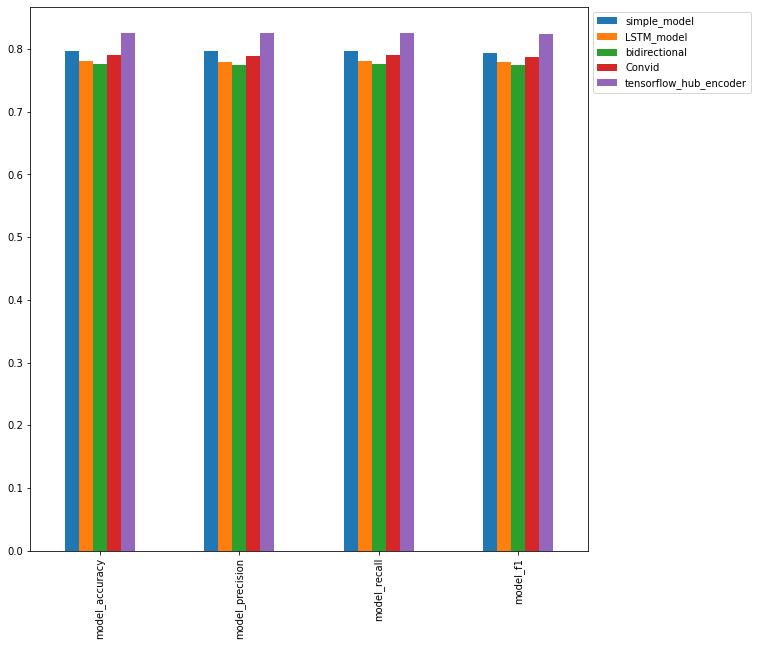

In [67]:
compair_model.plot(kind='bar',figsize=(10,10)).legend(bbox_to_anchor=(1.0, 1.0));

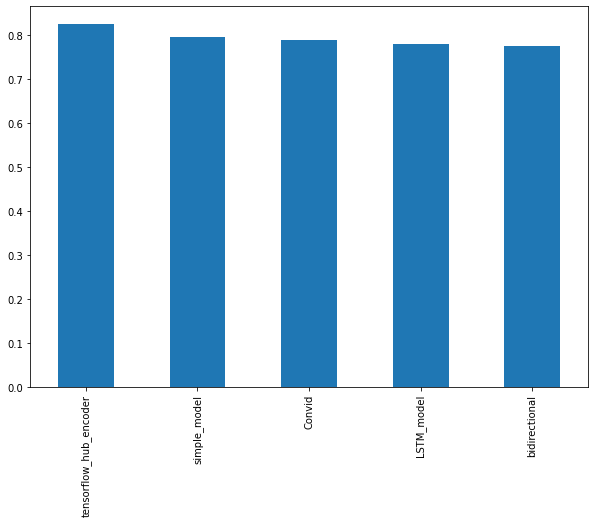

In [73]:
# Sort model results by f1-score
all_result=compair_model.transpose()
all_result.sort_values('model_f1', ascending=False)['model_f1'].plot(kind='bar', figsize=(10, 7));

In [ ]:
## loading and saving of the model:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")


In [93]:
# Load model with custom Hub Layer (required with HDF5 format)

loaded_model_6 = tf.keras.models.load_model("model_6.h5", 
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [95]:
loaded_model_6.evaluate(valid_sentence,valid_label)

48/48 [==============================] - 2s 28ms/step - loss: 0.4031 - accuracy: 0.8273


[0.4030812680721283, 0.8273144960403442]

In [97]:
model_6.evaluate(valid_sentence,valid_label)

48/48 [==============================] - 2s 32ms/step - loss: 0.4031 - accuracy: 0.8273


[0.4030812084674835, 0.8273144960403442]

In [119]:
 ## compairing the predictions and original targets for sentence also finding the most wrong predictions:

 valid_dataframe=pd.DataFrame({
                                'text':valid_sentence,
                               'target':valid_label,
                               'pred':model_6_pred_probs,
                               'prob_pred':model_6_pred})

In [120]:
valid_dataframe

,text,target,pred,prob_pred
0,@olliebailey11 havnt you crashed ? ??,0,0.0,0.224934
1,Did you miss the #BitCoin explosion - Don't mi...,0,0.0,0.076092
2,FYI: ;ACCIDENT PROPERTY DAMAGE;3460 LIMESTONE ...,1,1.0,0.904918
3,#psd #special Olap #world pres: http://t.co/9x...,1,0.0,0.216491
4,MORE--&gt;OSHA officers on siteinvestigating N...,1,1.0,0.957740
...,...,...,...,...
1518,They are making a Bad Boys 3 and 4!! A must see,0,0.0,0.029904
1519,Forest fires could delay @AbbyAirshow but offi...,1,1.0,0.890712
1520,There is no greater tragedy than becoming comf...,0,0.0,0.102478
1521,Truth...\nhttps://t.co/4ZQrsAQrRT\n#News\n#BBC...,1,0.0,0.170099


In [126]:
## prediction of wrong target values:
most_wrong_pred=valid_dataframe[valid_dataframe['target']!= valid_dataframe['pred']].sort_values('prob_pred',ascending=False)
most_wrong_pred

,text,target,pred,prob_pred
1269,Teen Disaster Preparedness Event in Van Nuys A...,0,1.0,0.983139
997,We should all have a fire safety plan. RT @Mat...,0,1.0,0.961084
1427,Truck Driver Salvages Banned Tomatoes From Des...,0,1.0,0.955491
1417,FAAN orders evacuation of abandoned aircraft a...,0,1.0,0.952374
1225,#Sismo M 1.3 - 1km NNE of The Geysers Californ...,0,1.0,0.906147
...,...,...,...,...
83,Even if u have your weapon and your badge we g...,1,0.0,0.045946
1102,the sunset boys wreck my bed original 1979 u...,1,0.0,0.042651
1390,Flattened thee striker,1,0.0,0.041682
45,Do you feel like you are sinking in low self-i...,1,0.0,0.038852


In [134]:
## False Positive:
for false_positive in most_wrong_pred[:10].itertuples():
    _,text,target,pred,pred_prob=false_positive
    print(f'target:{target}\n pred:{pred}\n pred_probability:{pred_prob}')
    print(f'Test::{text}')
    print('-------------\n')

target:0
 pred:1.0
 pred_probability:0.9831386804580688
Test::Teen Disaster Preparedness Event in Van Nuys August 11 @ 5:30pm http://t.co/fXUX987vZx via @VanNuysCouncil
-------------

target:0
 pred:1.0
 pred_probability:0.9610844850540161
Test::We should all have a fire safety plan. RT @Matt_Kroschel: MOCK WILDFIRE near #Vail as agencies prepare for the worst. http://t.co/SWwyLRk0fv
-------------

target:0
 pred:1.0
 pred_probability:0.9554905295372009
Test::Truck Driver Salvages Banned Tomatoes From Destruction on #Russian Border http://t.co/7b2Wf6ovFK #news
-------------

target:0
 pred:1.0
 pred_probability:0.9523735642433167
Test::FAAN orders evacuation of abandoned aircraft at MMA http://t.co/dEvYbnVXGQ via @todayng
-------------

target:0
 pred:1.0
 pred_probability:0.9061474204063416
Test::#Sismo M 1.3 - 1km NNE of The Geysers California: Time2015-08-05 23:40:21 UTC2015-08-05 16:40:21 -07:00 a... http://t.co/x6el3ySYcn #CS
-------------

target:0
 pred:1.0
 pred_probability:0.9

In [161]:
## finally time to make predictions o n the test data:
test_sentences=test_data['text'].to_list() # into the list
test_sample=random.sample(test_sentences, 10)
for test_text in test_sample:
    pred_prob=tf.squeeze(model_6.predict([test_text]))
    print(f'prediction_probability:{pred_prob}')
    pred=tf.round(pred_prob)
    print(f'actual_prediction:{pred}')
    print(f'Test_Text::{test_text}\n---------------\n')

prediction_probability:0.7770441174507141
actual_prediction:1.0
Test_Text:Don't blame the messenger. Food panic in Venezuela. 1 minute video.Thanks SHTFPlan!
https://t.co/QBSTQXA6QX
---------------

prediction_probability:0.9072712063789368
actual_prediction:1.0
Test_Text:#Muslim cemetery demolition infuriates cultural groups in #Israel 

http://t.co/vpLZKUidz2
---------------

prediction_probability:0.8006669282913208
actual_prediction:1.0
Test_Text:@Cynicalreality when the subject is mass murder. @LetsBe_Rational @MishaWeller @llr517
---------------

prediction_probability:0.2532767951488495
actual_prediction:0.0
Test_Text:Sorry Kylie pretty sure James?? ate Bruce ?? this morning. #Catastrophe  https://t.co/TR6oM9yN2C
---------------

prediction_probability:0.9940469264984131
actual_prediction:1.0
Test_Text:http://t.co/B2FaSrt1tN Twelve feared killed in Pakistani air ambulance helicopter crash http://t.co/O8BJXnEPQm
---------------

prediction_probability:0.03481215983629227
actual_p

In [174]:
## finally time to make predictions own sentence:
own="sometimes life is like a cyclone,flood "
pred_prob=tf.squeeze(model_6.predict([own]))
print(f'prediction_probability:{pred_prob}')
pred=tf.round(pred_prob)
print(f'actual_prediction:{pred}')
print(f'Test_Text::{own}\n---------------\n')
if pred < 1:
    print('Not a dister dont panic.......')
else:
    print('It is disaster')
   

prediction_probability:0.12032227218151093
actual_prediction:0.0
Test_Text::sometime life is like a cyclone,flood 
---------------

Not a dister dont panic.......
